In [1]:
!wget -O data.csv https://www.openml.org/data/get_csv/16826755/phpMYEkMl

--2021-11-05 01:59:48--  https://www.openml.org/data/get_csv/16826755/phpMYEkMl
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘data.csv’

data.csv                [  <=>               ] 114.98K   272KB/s    in 0.4s    

2021-11-05 01:59:49 (272 KB/s) - ‘data.csv’ saved [117743]



In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [3]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})


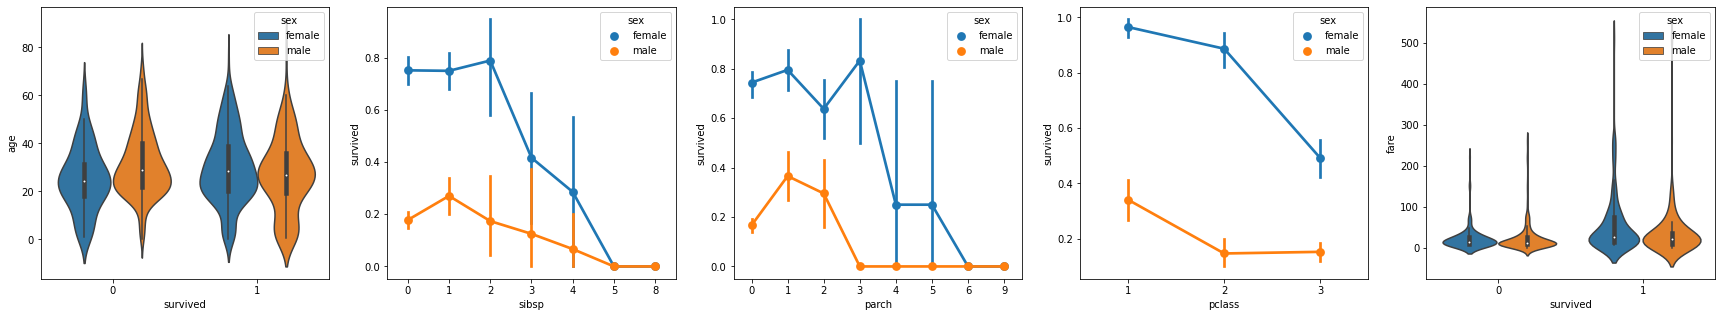

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [6]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [7]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [8]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = keras.Sequential(
    [
        layers.Dense(5, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [15]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 1ms/step - loss: 0.7131 - accuracy: 0.3744
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.4617
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5108
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5419
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5550
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5766
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5837
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5945
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.5945
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6363 - accuracy: 0.6041
Epoch 11/50
27/27 [

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [17]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(metrics.accuracy_score(y_test, y_pred))

0.8133971291866029
